# 🚩 Dataframe Date/Time Type
## 주요 토픽
1. Datetime 데이터 타입
2. Formatting & Parting
3. Time Delta
4. Datetime 인덱스
5. Shifting & Aggregating
## 목표
1. Understand nuances of the datetime types in base Python and Pandas
2. Apply custom date formats and extract datetime components from datetime data
3. Access portions of time series data and offset time series for period-by-period comparison
4. Create custom time periods and reshape data to fit periods of interest

In [1]:
import pandas as pd
import numpy as np

## 1. Times in 파이썬, 판다스
### > 파이썬
- Date Components + Time Components

In [2]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2023, 8, 3, 22, 29, 33, 872742)

In [3]:
type(now)

datetime.datetime

### > 판다스
- astype 메서드
    - convert strings to datetimes, 그러나 판다스가 dates라고 인식하지 못하는 값들로 인해 에러가 발생한다
- to_datetime 메서드 (RECOMMENDED)
    1. errors='coerce'
    2. infer_datetime_format=True
    3. format

In [4]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv')
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [5]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 167.8 MB


In [6]:
retail['date'] = pd.to_datetime(
    retail['date'],
    errors='coerce',
    infer_datetime_format=True
)

retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [7]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


### > Date Codes
- %D
- %Y (4자리 연도)
- %y (2자리 연도)
- %m (월; 숫자)
- %B (월; 문자열 전체)
- %b (월; 문자열 파트)
- %d (일; 숫자)
- %  (요일; 숫자)
    - 0-6 (일-토)
- %A (요일; 문자열)
- %U (week of year)
- %j (day of year)
### > Time Codes
- %T
- %H (시; 24)
- %I (시; 12)
- %p (오전, 오후)
- %M (분)
- %S (초)
### > dt.strftime 메서드
- object 타입을 리턴한다

In [8]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 48.3+ MB


In [10]:
retail['date'].dt.strftime('%Y').head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: date, dtype: object

In [11]:
retail['date'].dt.strftime('%y-%b-%d').head()

0    16-Jan-01
1    16-Jan-01
2    16-Jan-01
3    16-Jan-01
4    16-Jan-01
Name: date, dtype: object

### > Extract datetime components
- dt 접근자
    - date / time → object
    - year, month, day, dayofweek / hour, minute, second → int
    - day_name

In [12]:
retail.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0


In [13]:
retail.assign(
    year=retail['date'].dt.year,
    month=retail['date'].dt.month,
    day=retail['date'].dt.day
).head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,2016,1,1
1,1945945,2016-01-01,1,BABY CARE,0.0,0,2016,1,1
2,1945946,2016-01-01,1,BEAUTY,0.0,0,2016,1,1
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,2016,1,1
4,1945948,2016-01-01,1,BOOKS,0.0,0,2016,1,1


## 2. Time Delta
- Amount of time or difference between 2 datetimes
- How to derive time delta?
    1. when subtracting two datetime values
    2. to_timedelta 메서드
        - 'D' (day)
        - 'W' (week)
        - 'H' (hour)
        - 'T' (minute)
        - 'S' (second)

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 48.3+ MB


In [15]:
retail = retail.assign(birthday = pd.to_datetime('1950-01-01'))
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01


In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   birthday     1054944 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 56.3+ MB


In [17]:
retail = retail.assign(
    age=(retail['date'] - retail['birthday']).dt.days / 365.25
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631


In [18]:
retail = retail.assign(
    retirement_date=retail['date'] + (pd.to_timedelta(365.25, unit='D') * 20)
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age,retirement_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631,2036-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631,2036-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631,2036-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631,2036-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631,2036-01-01


## 3. Time Series 인덱스
- Use datetimes as INDEX to allow for intuitive slicing of Dataframe
    - keep it sorted
    - Line plot 그릴 때 유용하다

In [19]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [20]:
retail.index = retail['date']
retail.head()

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-01-01,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
2016-01-01,1945945,2016-01-01,1,BABY CARE,0.0,0
2016-01-01,1945946,2016-01-01,1,BEAUTY,0.0,0
2016-01-01,1945947,2016-01-01,1,BEVERAGES,0.0,0
2016-01-01,1945948,2016-01-01,1,BOOKS,0.0,0


In [21]:
retail.loc['2017']

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2017-01-01,2596374,2017-01-01,1,AUTOMOTIVE,0.000,0
2017-01-01,2596375,2017-01-01,1,BABY CARE,0.000,0
2017-01-01,2596376,2017-01-01,1,BEAUTY,0.000,0
2017-01-01,2596377,2017-01-01,1,BEVERAGES,0.000,0
2017-01-01,2596378,2017-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,POULTRY,438.133,0
2017-08-15,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,2017-08-15,9,PRODUCE,2419.729,148


In [22]:
retail.loc['2017-08']

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2017-08-01,2974158,2017-08-01,1,AUTOMOTIVE,5.000,0
2017-08-01,2974159,2017-08-01,1,BABY CARE,0.000,0
2017-08-01,2974160,2017-08-01,1,BEAUTY,4.000,0
2017-08-01,2974161,2017-08-01,1,BEVERAGES,2627.000,26
2017-08-01,2974162,2017-08-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,POULTRY,438.133,0
2017-08-15,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,2017-08-15,9,PRODUCE,2419.729,148


In [23]:
retail.loc['2016-03':'2017-08-01']

,id,date,store_nbr,family,sales,onpromotion
date,,,,,,
2016-03-01,2052864,2016-03-01,1,AUTOMOTIVE,5.000000,0
2016-03-01,2052865,2016-03-01,1,BABY CARE,0.000000,0
2016-03-01,2052866,2016-03-01,1,BEAUTY,3.000000,0
2016-03-01,2052867,2016-03-01,1,BEVERAGES,2371.000000,15
2016-03-01,2052868,2016-03-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2017-08-01,2975935,2017-08-01,9,POULTRY,570.196000,0
2017-08-01,2975936,2017-08-01,9,PREPARED FOODS,50.462997,0
2017-08-01,2975937,2017-08-01,9,PRODUCE,2470.461000,151


In [24]:
retail.index

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1054944, freq=None)

## 4. Time Series 결측값
- ffill, bfill 메서드
- interpolate 메서드

In [25]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [26]:
retail_agg = (
    retail
    .groupby('date')
    .agg({'sales': 'sum'})
    .round().iloc[:10]
)
retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,1066677.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,835320.0
2016-01-06,821686.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


In [27]:
retail_agg.iloc[1] = np.NaN
retail_agg.iloc[4:6] = np.NaN

retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,NaN
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


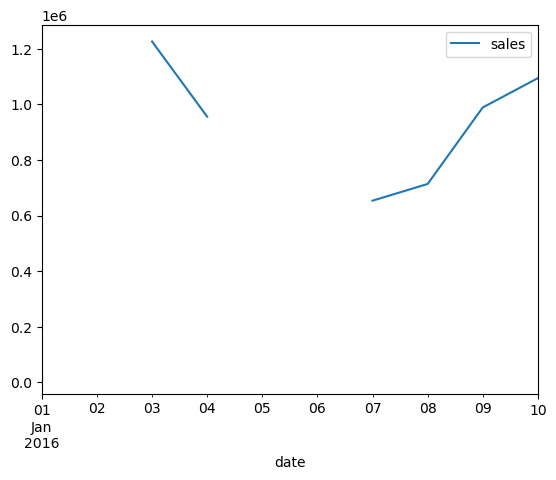

In [28]:
retail_agg.plot();

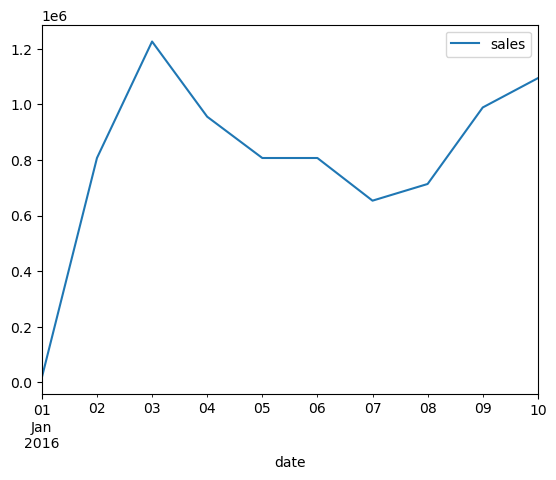

In [29]:
retail_agg.fillna(retail_agg['sales'].mean()).plot();

In [30]:
retail_agg

,sales
date,
2016-01-01,16433.0
2016-01-02,NaN
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0


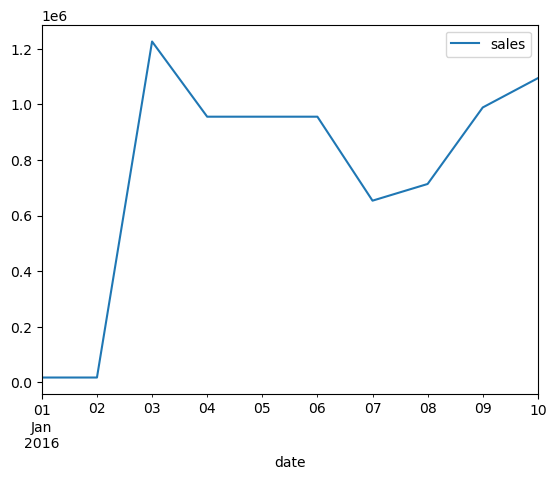

In [31]:
retail_agg.ffill().plot();

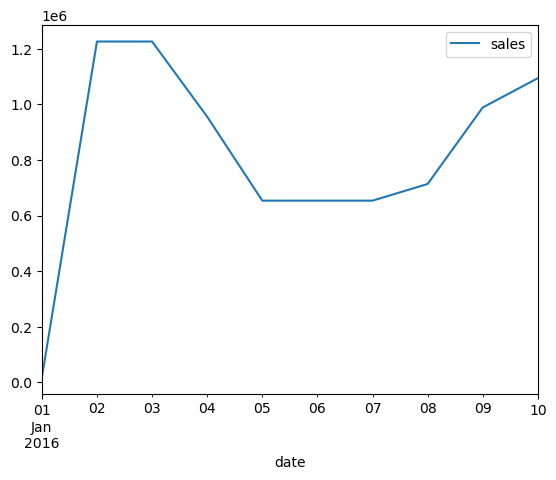

In [32]:
retail_agg.bfill().plot();

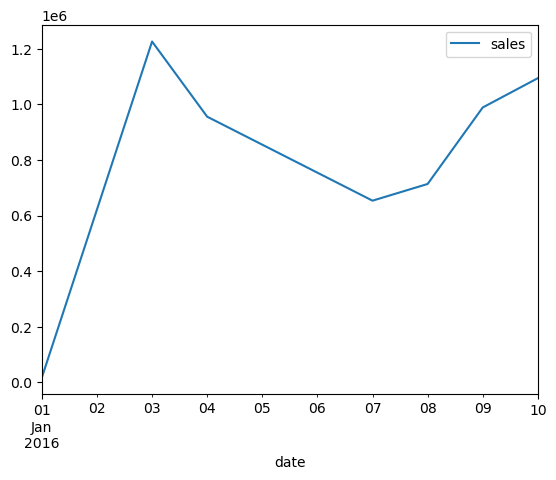

In [33]:
retail_agg.interpolate().round().plot();

## 5. Shifting Series

In [34]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv')

retail_agg = (
    retail
    .groupby('date')
    .agg({'sales': 'sum'})
    .round().iloc[:10]
).iloc[1:]

retail_agg

,sales
date,
2016-01-02,1066677.0
2016-01-03,1226736.0
2016-01-04,955957.0
2016-01-05,835320.0
2016-01-06,821686.0
2016-01-07,653504.0
2016-01-08,713608.0
2016-01-09,989209.0
2016-01-10,1094694.0


In [35]:
retail_agg.assign(
    yesterday_sales=retail_agg['sales'].shift()
)

,sales,yesterday_sales
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,1066677.0
2016-01-04,955957.0,1226736.0
2016-01-05,835320.0,955957.0
2016-01-06,821686.0,835320.0
2016-01-07,653504.0,821686.0
2016-01-08,713608.0,653504.0
2016-01-09,989209.0,713608.0
2016-01-10,1094694.0,989209.0


In [36]:
retail_agg.assign(
    yesterday_sales=retail_agg['sales'] / retail_agg['sales'].shift()
)

,sales,yesterday_sales
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,1.150054
2016-01-04,955957.0,0.779269
2016-01-05,835320.0,0.873805
2016-01-06,821686.0,0.983678
2016-01-07,653504.0,0.795321
2016-01-08,713608.0,1.091972
2016-01-09,989209.0,1.386208
2016-01-10,1094694.0,1.106636


### > ✅ Pro Tip
- diff 메서드
    - useful when measuring absolute changes over time
    - 디폴트로는 prior row와 계산하지만 row 개수를 명시할 수 있다

In [37]:
retail_agg.assign(
    daily_change=retail_agg['sales'].diff()
)

,sales,daily_change
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,160059.0
2016-01-04,955957.0,-270779.0
2016-01-05,835320.0,-120637.0
2016-01-06,821686.0,-13634.0
2016-01-07,653504.0,-168182.0
2016-01-08,713608.0,60104.0
2016-01-09,989209.0,275601.0
2016-01-10,1094694.0,105485.0


In [38]:
retail_agg.assign(
    daily_change=(retail_agg['sales'].diff() / retail_agg['sales'].shift())
)

,sales,daily_change
date,,
2016-01-02,1066677.0,NaN
2016-01-03,1226736.0,0.150054
2016-01-04,955957.0,-0.220731
2016-01-05,835320.0,-0.126195
2016-01-06,821686.0,-0.016322
2016-01-07,653504.0,-0.204679
2016-01-08,713608.0,0.091972
2016-01-09,989209.0,0.386208
2016-01-10,1094694.0,0.106636


## 6. Time Series 리샘플링
resample 메서드

In [39]:
retail = pd.read_csv('./data/retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [40]:
(
    retail
    .groupby([retail['date'].dt.year, retail['date'].dt.month])
    .agg('sum', numeric_only=True)
    .round(2)
)

id  store_nbr        sales  onpromotion
date date                                                   
2016 1     109023650109    1519155  23977804.89       119578
     2     104752572111    1421145  21947408.80       183541
     3     114930124749    1519155  23131780.88       181790
     4     114128305830    1470150  25963025.10       215312
     5     120935040633    1519155  24779432.26       370019
     6     119939514750    1470150  22209218.58       285416
     7     126939956517    1519155  23462672.43       264605
     8     129991635081    1519155  22452414.32       271592
     9     128703960990    1470150  22417448.10       296361
     10    135996550965    1519155  24030389.82       370514
     11    134515169910    1470150  24642640.20       438358
     12    137373141510    1470150  29640287.58       517498
2017 1     144954704169    1519155  26328159.94       363428
     2     133549812396    1372140  23250112.37       297254
     3     150762737565    1519155  26704017.69       339291
     4     148805027910    1470150  25895308.49       371042
     5     156767653449    1519155  26911847.25       414646
     6     154616236830    1470150  25682822.12       394582
     7     162772569333    1519155  27011477.57       409128
     8      79856476425     735075  12433322.94       160278

In [41]:
(
    retail
    .set_index('date')
    .resample('M')
    .sum(numeric_only=True)
    .round(2)
)

,id,store_nbr,sales,onpromotion
date,,,,
2016-01-31,109023650109,1519155,23977804.89,119578
2016-02-29,104752572111,1421145,21947408.80,183541
2016-03-31,114930124749,1519155,23131780.88,181790
2016-04-30,114128305830,1470150,25963025.10,215312
2016-05-31,120935040633,1519155,24779432.26,370019
2016-06-30,119939514750,1470150,22209218.58,285416
2016-07-31,126939956517,1519155,23462672.43,264605
2016-08-31,129991635081,1519155,22452414.32,271592
2016-09-30,128703960990,1470150,22417448.10,296361
